In [30]:
import numpy as np
import cv2
import ImageView as iv
import matplotlib.pyplot as plt
%matplotlib inline

lena = 'lena.png'
LFC = 'LFC.jpeg'

def detectFace(file, scaleFactor, minNeighbors, title):
    """
    Oppdager et ansikt vendt mot kamera
   
    Parameters
    ---------
    file         : Bildefil
                    Pathen til filen der original bildet befinner seg uten andvending
    scaleFactor  : int
                    Kompenserer i tilfelle noen ansikter er nærmere kamera enn andre
    minNeighbors : int
                    spesifiserer antall naboer en rektangel bør ha for å bli kalt et "ansikt"
    title        : text
                    Tittelen på bildet som er anvendt
    """
    image = cv2.imread(file)
    
    def convertToRGB(image): #open CV laster bilder i BGR. Konverterer til RGB
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces_rects = haar_cascade_face.detectMultiScale(image, scaleFactor, minNeighbors);
    
    for (x,y,w,h) in faces_rects:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    print("Antall ansikt er", len(faces_rects))
        
    iv.singleView(convertToRGB(image), title)

Antall ansikt er 1


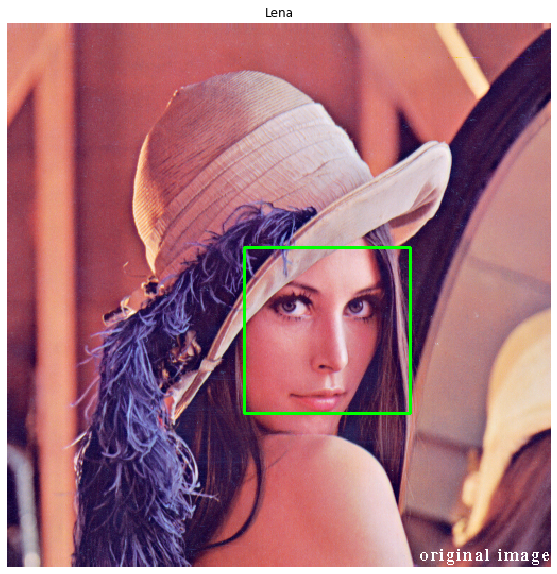

In [26]:
detectFace(lena, 1.2, 5, "Lena")

Antall ansikt er 5


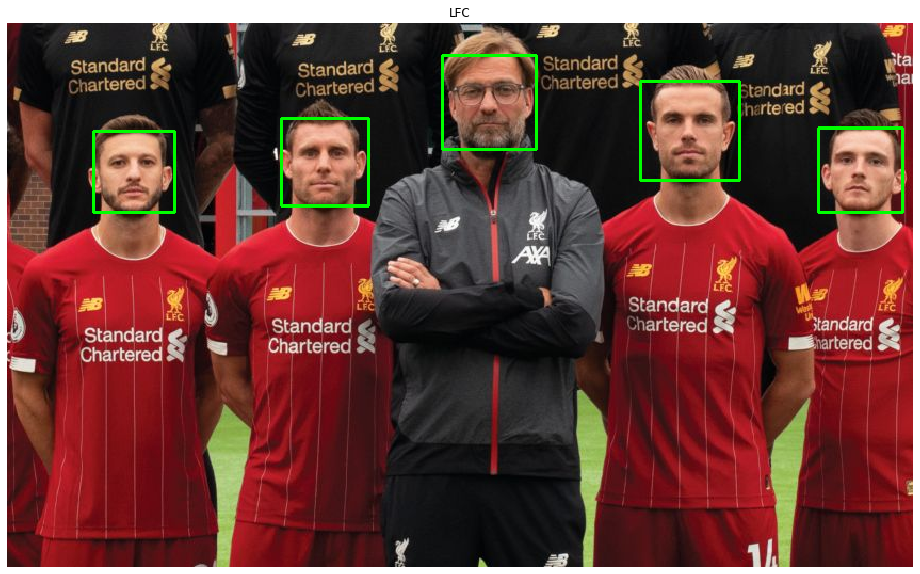

In [31]:
detectFace(LFC, 1.2, 5, "LFC")